## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [1]:
# Your code here - remember to use markdown cells for comments as well!
#Jack Pacheco
#JP Ventura Julian Ward

In [2]:
#Loading in python dependencies


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import zipfile
import sqlite3
from scipy import stats 

%matplotlib inline

In [4]:
movie3 = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie3 = movie3.rename(columns={'title':"movie"})
movie3['movie'] = movie3['movie'].map(lambda x: "Harry Potter and the Deathly Hallows: Part 1" if x == "Harry Potter and the Deathly Hallows Part 1" else x)
movie3.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#pulling in movie budgets dataset and preparing it for joining by changing object types to int. 

In [6]:
moviebudgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.strip("$"))
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.replace(",", ""))

moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.strip("$"))
moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.replace(",",""))

moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.strip("$"))
moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.replace(",",""))


moviebudgets= moviebudgets.astype({'production_budget': np.int64, 'domestic_gross': np.int64, 'worldwide_gross': np.int64})
moviebudgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [7]:
#joining movie budgets dataset with bom movie gross so we can have the studio names

In [8]:
movie_total_gross = movie3.join(moviebudgets.set_index("movie"), on= ['movie'],rsuffix = "___")
movie_total_gross = movie_total_gross.set_index('id')
movie_total_gross

,movie,studio,domestic_gross,foreign_gross,year,release_date,production_budget,domestic_gross___,worldwide_gross
id,,,,,,,,,
47.0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN
38.0,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
NaN,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN


In [9]:
movie4 = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [10]:
movie4= movie4.rename(columns={'original_title':"movie"})
movie4 = movie4.set_index("movie")


In [11]:
#pullin in tmdb ratings so we have budget info and ratings 

In [12]:
movies_and_rating = movie_total_gross.join(movie4, on = 'movie', how = 'outer', lsuffix = '__')

In [13]:
movies_and_rating

,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
47.0,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,24.445,2010-06-17,Toy Story 3,7.7,8340.0
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,0.0,"[12, 14, 10751]",12444.0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
38.0,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,27.920,2010-07-16,Inception,8.3,22186.0
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,15.041,2010-05-16,Shrek Forever After,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,0.600,2018-10-13,Laboratory Conditions,0.0,1.0
NaN,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0
NaN,The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,0.600,2018-10-01,The Last One,0.0,1.0
NaN,Trailer Made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,0.600,2018-06-22,Trailer Made,0.0,1.0


In [14]:
movies_and_rating.head()


,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
47.0,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,24.445,2010-06-17,Toy Story 3,7.7,8340.0
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,0.0,"[12, 14, 10751]",12444.0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
38.0,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,27.920,2010-07-16,Inception,8.3,22186.0
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,15.041,2010-05-16,Shrek Forever After,6.1,3843.0


In [15]:
#dropping unnecessary columns

In [16]:
movies_and_rating.drop(["Unnamed: 0",'id','title', 'genre_ids', 'title'],  axis=1, inplace=True)


In [17]:
movies_and_rating = movies_and_rating.set_index('movie')

In [18]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-13,0.0,1.0
_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-05-01,0.0,1.0
The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-01,0.0,1.0


In [19]:
#dropping movies that don't have enough information to be of use

In [20]:
movies_and_rating.dropna(axis = 0, thresh = 6, inplace = True)





In [21]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,en,20.340,2010-06-23,6.0,4909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loving Pablo,Uni.,22000.0,NaN,2018.0,NaN,NaN,NaN,NaN,es,12.937,2018-06-15,6.1,505.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,0.600,2015-08-14,7.0,1.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,1.176,2016-10-23,6.6,10.0


In [22]:
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as imdb_zip:
    imdb_zip.extractall("zippedData")
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [23]:
movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [24]:
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [25]:
merged = pd.merge(movie_ratings, movie_basics, on='movie_id')
merged = merged.rename(columns={'primary_title':"movie"})
merged = merged.set_index('movie')
merged

,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
movie,,,,,,,
Laiye Je Yaarian,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
Borderless,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
Just Inès,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
The Legend of Hercules,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
Até Onde?,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
Caisa,tt9805820,8.1,25,Caisa,2018,84.0,Documentary
Code Geass: Lelouch of the Rebellion - Glorification,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
Sisters,tt9851050,4.7,14,Sisters,2019,NaN,"Action,Drama"


In [26]:
master_df = movies_and_rating.join(merged, on = 'movie', how = 'outer', lsuffix = '__')

In [27]:
master_df.dropna(axis = 0, thresh = 9, inplace = True)

In [28]:
master_df = master_df.set_index("movie")

In [29]:
master_df.drop(["domestic_gross___",'movie_id','original_title'],  axis=1, inplace=True)

In [30]:
master_df["Total_Profit"] = (master_df.worldwide_gross - master_df.production_budget)

In [31]:
master_df22 = master_df.copy()

In [32]:
master_df22["worldwide_gross"] = master_df.worldwide_gross.fillna(master_df["worldwide_gross"].median())

In [33]:
# Split genres into new rows
master_df_genre = master_df.copy()
master_df_genre['genres'] = master_df_genre['genres'].map(lambda x: x.split(',') if type(x) is str else x)
master_df_genre = master_df_genre.explode('genres')

In [34]:
# Drop irrelevant genres **help from Julian
drop_list = ['Talk-Show','Reality-TV','Game-Show','News', 'Short']

for dropg in drop_list:
    master_df_genre = master_df_genre[master_df_genre['genres'] != dropg].copy()

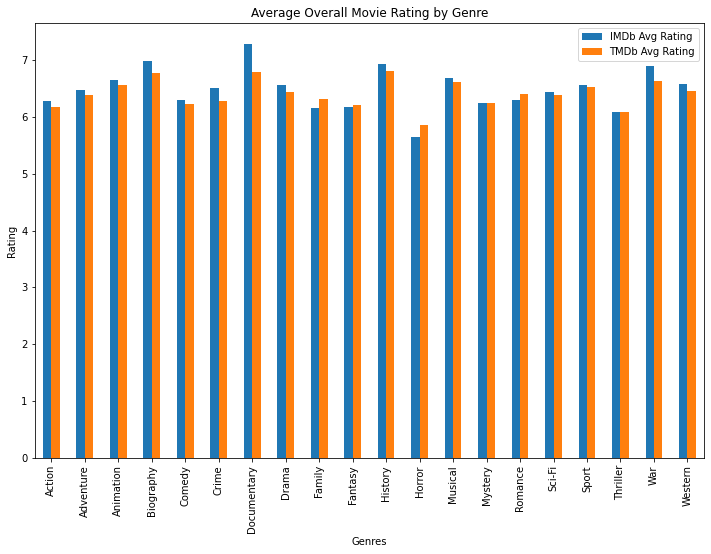

In [35]:
# Merge Musical and Musically
master_df_genre['genres'] = master_df_genre['genres'].map(lambda x: x if x != 'Music' else 'Musical')

# Group rows by individual genre for comparison
master_df_genre_grp = master_df_genre.groupby(['genres'])
master_df_genre_grp.mean().plot(figsize=(12,8),y=['averagerating','vote_average'],kind='bar',xlabel='Genres',ylabel='Rating',title='Average Overall Movie Rating by Genre')
plt.legend(labels=['IMDb Avg Rating','TMDb Avg Rating'])

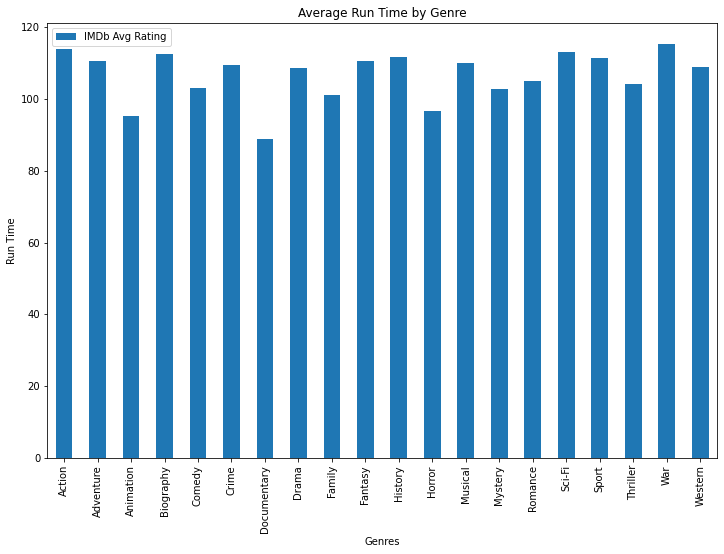

In [36]:
master_df_genre_grp = master_df_genre.groupby(['genres'])
master_df_genre_grp.mean().plot(figsize=(12,8),y=['runtime_minutes'],kind='bar',xlabel='Genres',ylabel='Run Time',title='Average Run Time by Genre')
plt.legend(labels=['IMDb Avg Rating','TMDb Avg Rating'])

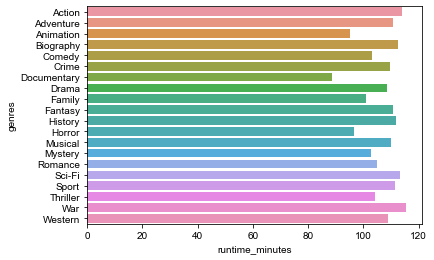

In [37]:
mdgrp = master_df_genre_grp.mean()
mdgrp['genres'] = mdgrp.index
sns.barplot(y ="genres", x = "runtime_minutes", data = mdgrp, orient = 'h')
sns.set(rc={"figure.figsize":(10,8)})

<AxesSubplot:xlabel='count', ylabel='genres'>

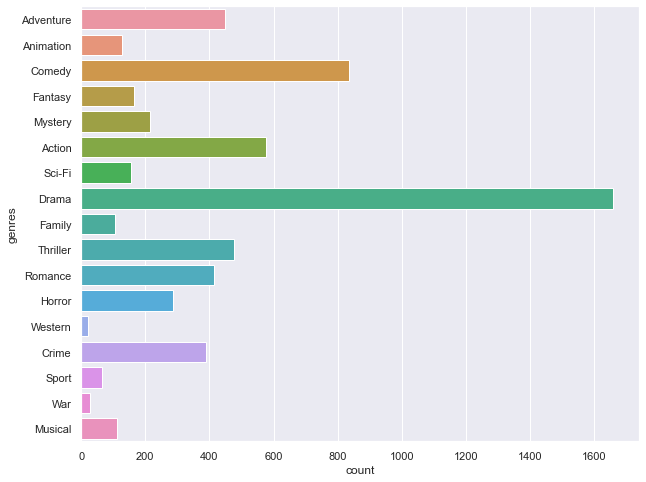

In [38]:
# Sub genre count
master_df_sub_genre = master_df_genre[(master_df_genre['genres'] != 'Documentary') & (master_df_genre['genres'] != 'Biography') & (master_df_genre['genres'] != 'History')]
sns.countplot(data=master_df_sub_genre,y='genres',orient='h')

In [39]:
master_df = master_df_genre.copy()

In [40]:
master_df["Total_Profit"] = (master_df.worldwide_gross - master_df.production_budget)
master_df["Profit%"] = ((master_df.Total_Profit)/master_df.production_budget)*100

In [41]:
master_df_genre_grp = master_df.groupby(['genres'])

<ipython-input-42-e2001fd37efd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


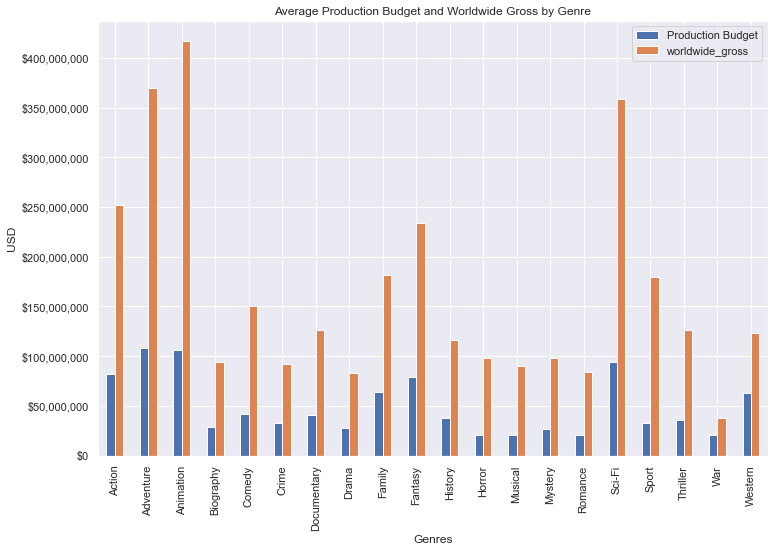

In [42]:
yticks = ["$0", "$50,000,000", "$100,000,000","$150,000,000","$200,000,000","$250,000,000","$300,000,000","$350,000,000","$400,000,000",]

ax = master_df_genre_grp.mean().plot(figsize=(12,8),y=['production_budget','worldwide_gross'],
                                     kind='bar',xlabel='Genres',ylabel='USD', title='Average Production Budget and Worldwide Gross by Genre')


ax.set_yticklabels(yticks)
plt.legend(labels=['Production Budget','worldwide_gross']);

''

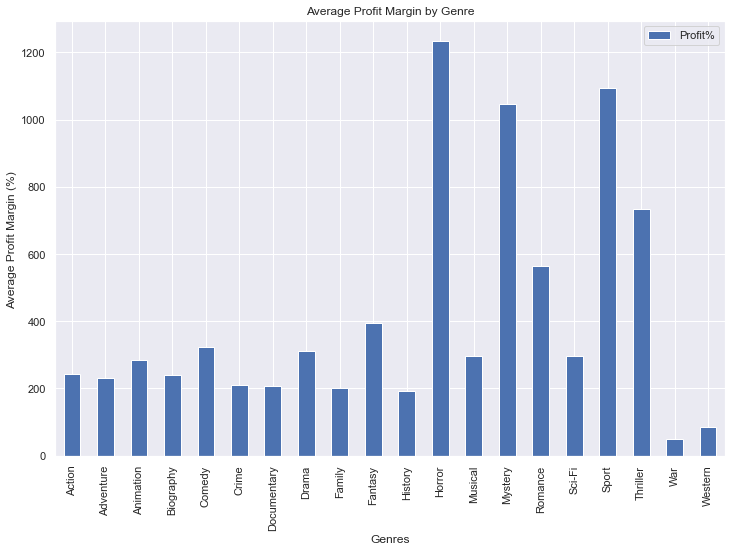

In [43]:
master_df_genre_grp.mean().plot(figsize=(12,8),y=['Profit%'],kind='bar'
                                ,xlabel='Genres',ylabel='Average Profit Margin (%) ',title='Average Profit Margin by Genre')
;

<ipython-input-44-201439dd1bd5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks);


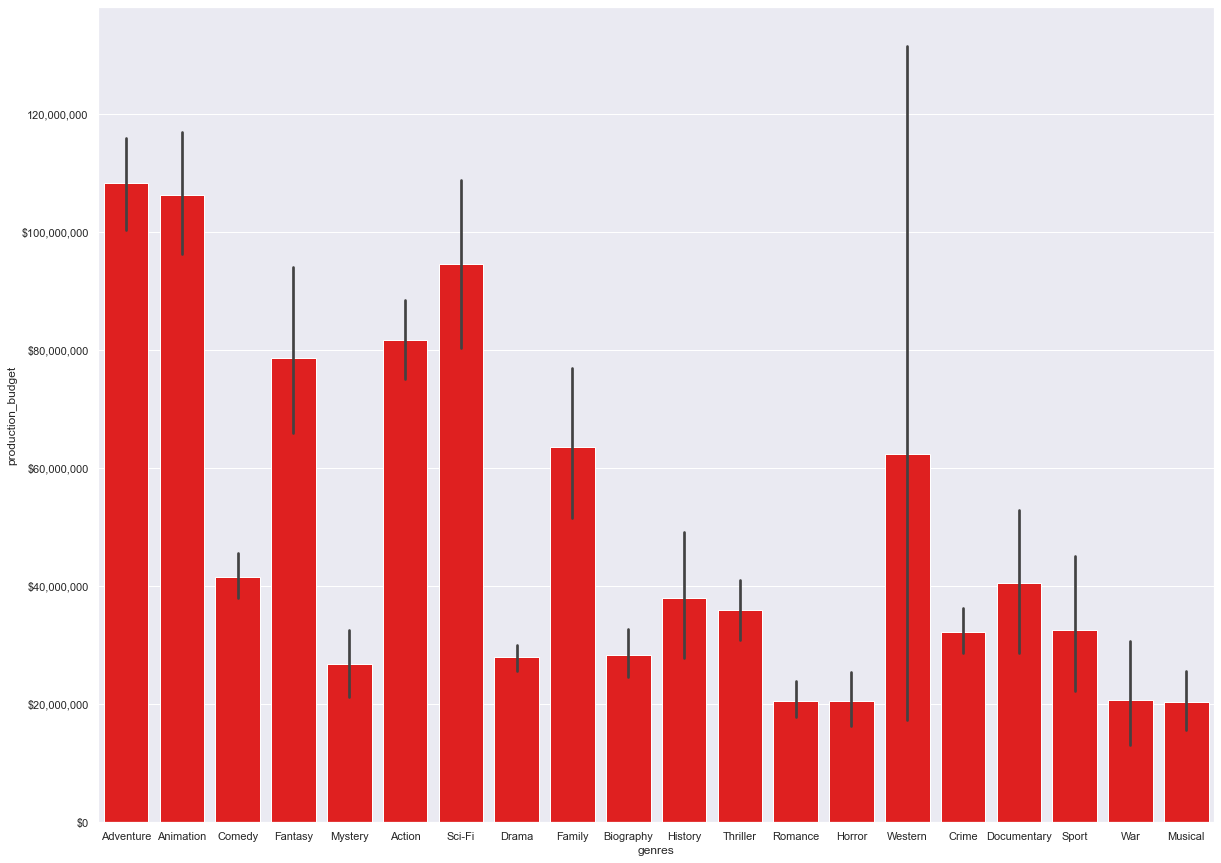

In [44]:
yticks = ["$0", "$20,000,000", "$40,000,000", "$60,000,000", "$80,000,000", "$100,000,000","120,000,000"]

sns.set(rc={"figure.figsize":(20, 15)})
ax = sns.barplot(data=master_df,x='genres',y='production_budget', color = "red", orient = 'v')
ax.set_yticklabels(yticks);

In [45]:
master_df.production_budget.corr(master_df.Total_Profit)

0.645238306897496

In [46]:
master_df.production_budget.corr(master_df.averagerating)

0.14159000612679062

In [47]:
master_df.production_budget.corr(master_df['Profit%'])

-0.09983003381523184

In [48]:
master_df.runtime_minutes.corr(master_df.averagerating)

0.2647187702866113

In [49]:
master_df.runtime_minutes.corr(master_df["Profit%"])

-0.07883337549573391

In [50]:
df_horror = master_df[master_df.genres == "Horror"]

In [51]:
stats.ttest_1samp(df_horror['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=3.53840163863994, pvalue=0.0005037350881016798)

In [52]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["Profit%"].mean(), scale = df_horror["Profit%"].std())

(-5257.722730797313, 7723.925043421251)

In [53]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["production_budget"].mean(),
                 scale = df_horror["production_budget"].std())

(-45559370.14877157, 86722009.8718485)

In [54]:
stats.ttest_1samp(df_horror['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-11.514922943844764, pvalue=1.0187816490342547e-23)

In [55]:
#Horror movies are statistically lower rated than other genres but cheaper to make and more profitable 

In [56]:
stats.t.interval(alpha = .95, df = len(master_df)-1, loc = master_df["averagerating"].mean(),
                 scale = master_df["averagerating"].std())

(4.483192602834453, 8.374823117171479)

In [57]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["averagerating"].mean(),
                 scale = df_horror["averagerating"].std())

(3.488166131914891, 7.798245017910892)

In [58]:
stats.ttest_1samp(df_horror['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-12.158746859779109, pvalue=1.0646080030052504e-27)

In [59]:
df_history = master_df[master_df.genres == "History"]

In [60]:
stats.t.interval(alpha = .95, df = len(df_history)-1, loc = df_history["averagerating"].mean(),
                 scale = df_history["averagerating"].std())

(5.401145570771209, 8.46445442922879)

In [61]:
stats.ttest_1samp(df_history['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=7.278683992861825, pvalue=3.384491411907055e-11)

In [62]:
#History movies are statistically higher rated than other movies 

In [63]:
stats.t.interval(alpha = .95, df = len(df_history)-1, loc = df_history["Profit%"].mean(), 
                 scale = df_history["Profit%"].std())

(-279.43118204750533, 661.1681850845049)

In [64]:
stats.ttest_1samp(df_history['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-6.679621081941746, pvalue=1.0098588830018177e-08)

In [65]:
stats.t.interval(alpha = .95, df = len(df_history)-1, loc = df_history["production_budget"].mean(), 
                 scale =df_history["production_budget"].std())

(-45443309.88826694, 121233140.39674151)

In [66]:
stats.ttest_1samp(df_history['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-1.8964229492508784, pvalue=0.06288841014512131)

In [67]:
#History movies are statistically less profitable than other movies, not statistically cheaper, but higher rated. 

In [68]:
df_mystery = master_df[master_df.genres == "Mystery"]

In [69]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["averagerating"].mean(),
                 scale = df_mystery["averagerating"].std())

(4.2095948284747315, 8.26296331106015)

In [70]:
stats.ttest_1samp(df_mystery['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-2.748469190571817, pvalue=0.0064987286517919265)

In [71]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["Profit%"].mean(), 
                 scale =df_mystery["Profit%"].std())

(-6319.355459118147, 8414.806136009865)

In [72]:
stats.ttest_1samp(df_mystery['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=2.0138774368039547, pvalue=0.04603971305391047)

In [73]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["production_budget"].mean(), 
                 scale =df_mystery["production_budget"].std())

(-40439626.55468299, 93945298.53975761)

In [74]:
stats.ttest_1samp(df_mystery['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-7.3137524048466975, pvalue=2.1883185455479766e-11)

In [75]:
#Statistically cheaper to make than other movies 

In [76]:
#mystery movies are statistically lower rated but statistically more profitable 

In [77]:
df_doc = master_df[master_df.genres == "Documentary"]

In [78]:
stats.t.interval(alpha = .95, df = len(df_doc)-1, loc = df_doc["averagerating"].mean(),
                 scale = df_doc["averagerating"].std())

(5.707386483626312, 8.853903838954334)

In [79]:
stats.ttest_1samp(df_doc['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=15.71710942432569, pvalue=1.2717029279209602e-37)

In [80]:
stats.t.interval(alpha = .95, df = len(df_doc)-1, loc = df_doc["Profit%"].mean(), 
                 scale =df_doc["Profit%"].std())

(-491.18942852416234, 905.2888423212319)

In [81]:
stats.ttest_1samp(df_doc['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-4.267096315550164, pvalue=6.896867062237742e-05)

In [82]:
stats.t.interval(alpha = .95, df = len(df_doc)-1, loc = df_doc["production_budget"].mean(),
                 scale = df_doc["production_budget"].std())

(-61895190.26469246, 142844396.6138988)

In [83]:
stats.ttest_1samp(df_doc['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-1.1944332643021827, pvalue=0.23685811669388854)

In [84]:
#Documentaries are statistically higher rated but statistically lower profit% and just as expensive to make as general

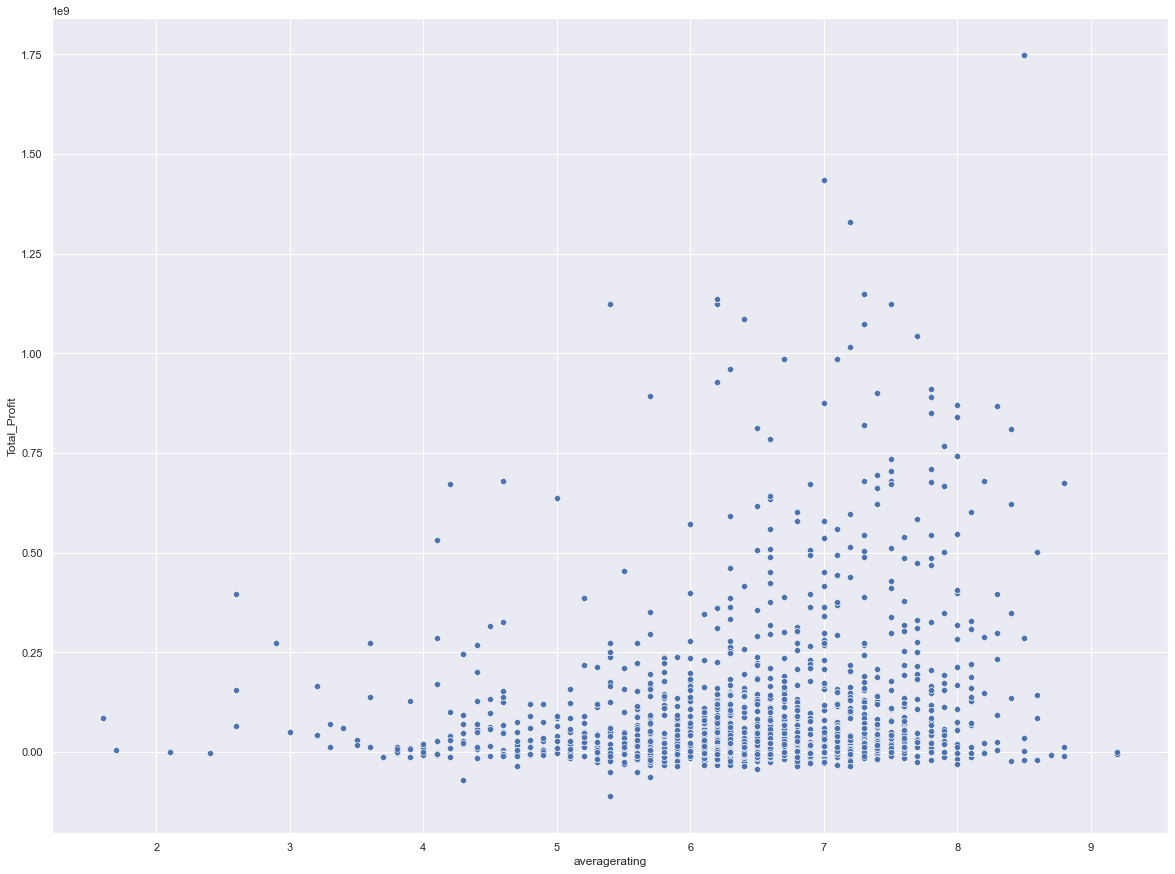

In [85]:
sns.scatterplot(x="averagerating",
y="Total_Profit",
data=master_df);

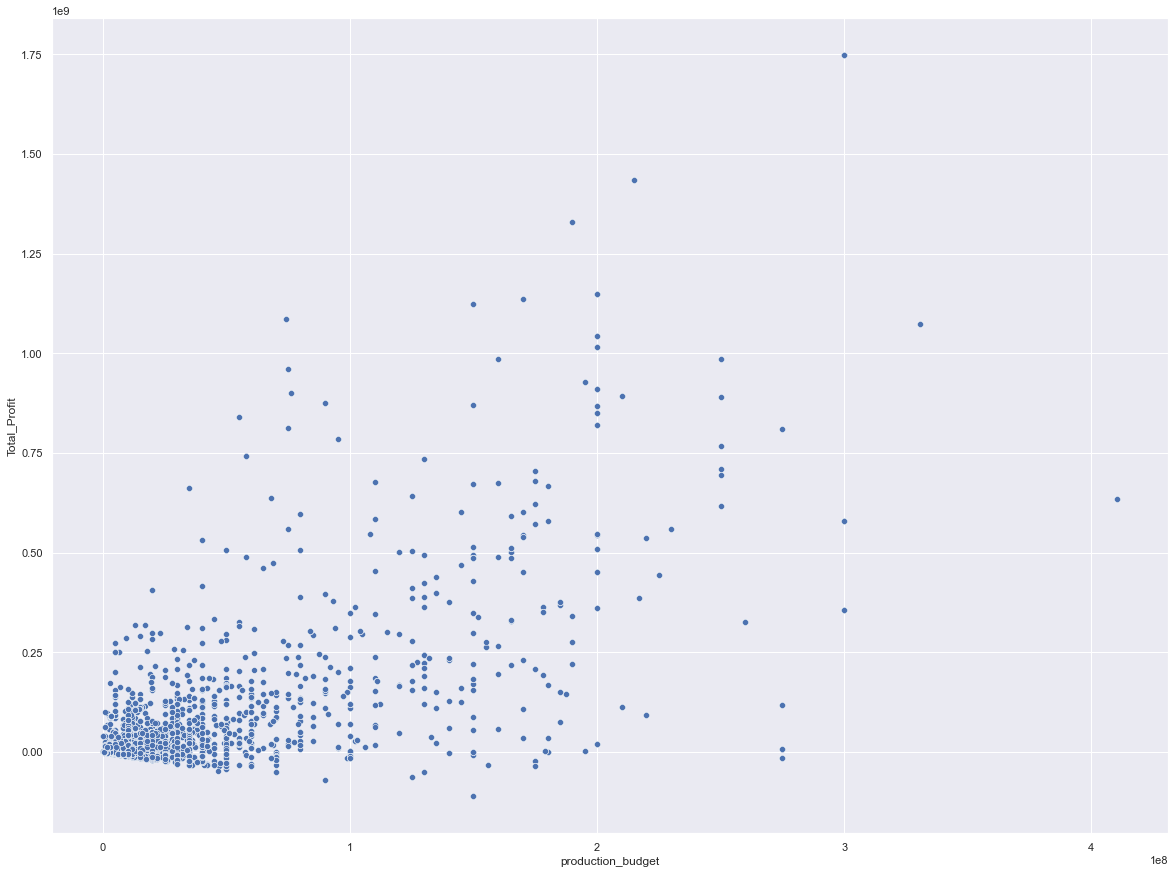

In [86]:
sns.scatterplot(x="production_budget",
y="Total_Profit",
data=master_df);